In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
%matplotlib inline
from lsst.sims.utils import _raDec2Hpid

In [2]:
filters = ['u', 'g', 'r', 'i', 'z', 'y']

filterName = filters[3]
# Load up the data, copy the keys into variables
data = np.load('../TriMaps/TRIstarDensity_%s_nside_128.npz' % filterName)
starDensity = data['starDensity'].copy()
# magnitude bins 
bins=data['bins'].copy()
# pixels where there were so many stars some were skipped
mask = data['overMaxMask']
data.close()

<ipython-input-5-e3bbbeebfc28>:7: RuntimeWarning: divide by zero encountered in log10
  hp.mollview(np.log10(starmap), unit='log stars/sq deg, %.1f < r < %.1f' % (bins[m_floor], bins[m_ceil]), nest=True)


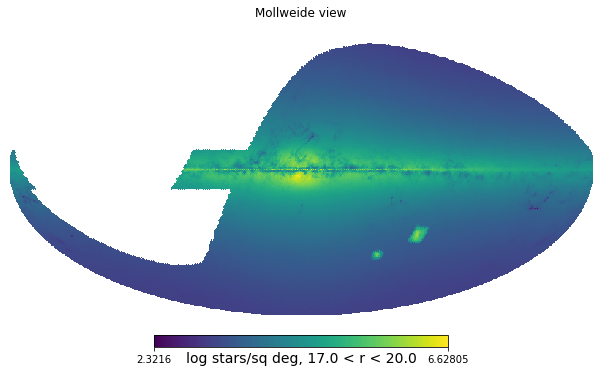

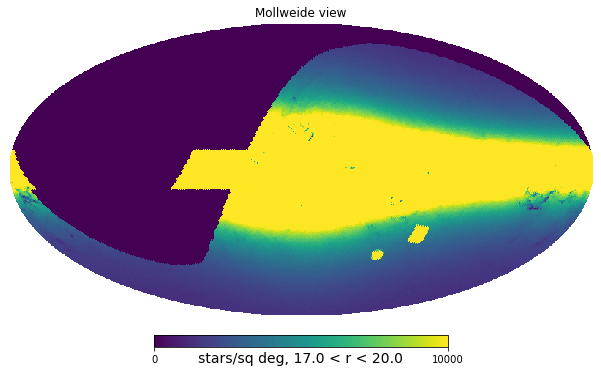

In [5]:
result_table = []
m1 = 17.
m2 = 20.
m_floor = np.where(bins <= m1)[0].max()
m_ceil = np.where(bins >= m2)[0].min()-1
starmap = starDensity[:,m_ceil+1] - starDensity[:,m_floor+1]
hp.mollview(np.log10(starmap), unit='log stars/sq deg, %.1f < r < %.1f' % (bins[m_floor], bins[m_ceil]), nest=True)
hp.mollview(starmap, unit='stars/sq deg, %.1f < r < %.1f' % (bins[m_floor], bins[m_ceil]), max=10000, nest=True)


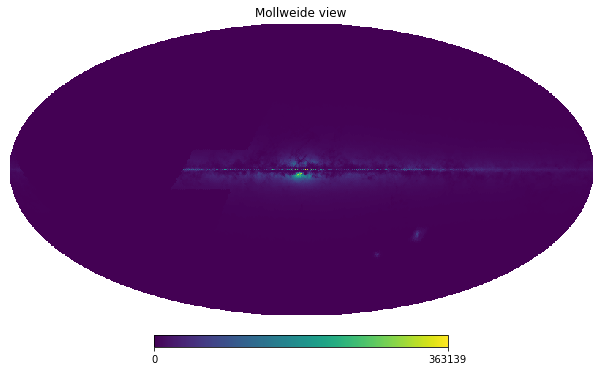

In [6]:
# let's just check a single frame
hp.mollview(starDensity[:,11], nest=True)